In [1]:
#c:\users\shree\appdata\roaming\python\python39\site-packages 
from nltk.corpus import stopwords
#import tensorflow_hub as hub
import tensorflow as tf
from keras.preprocessing.text import one_hot,Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation,Dropout,Dense
from keras.layers import Flatten,GlobalMaxPooling1D,Embedding,Conv1D,LSTM
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# export dataset as a csv file
df=pd.read_csv("F:/project sent/NIKE DOWNSHIFTER 12.csv")
df.head()

,review,rating
0,Poor quality,1
1,Product quality is not branded and and box,1
2,Do not purchase this item,1
3,Just awesome product 👌👍🫡😇Value for money 💸💰 pr...,5
4,Do not purchase this item,1


In [3]:
# shuffle the DataFrame rows
df = df.sample(frac = 1)

# print the shuffled DataFrame
print("\n Shuffled DataFrame:")
df.head()


 Shuffled DataFrame:


,review,rating
571,Very good product,5
281,Very comfortable and nice look,5
1303,Loking so nice but size not fit 10 numb not pa...,2
848,Loking so nice but size not fit 10 numb not pa...,2
1297,Very comfortable and nice look,5


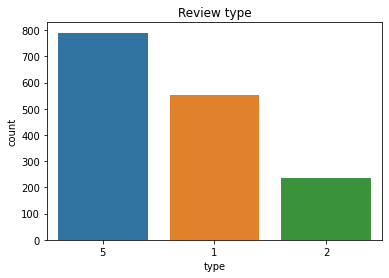

In [4]:
sns.countplot(
  x='rating',
  data=df,
  order=df.rating.value_counts().index
)

plt.xlabel("type")
plt.title("Review type");

In [5]:
#0-negative,1-positive
df.rating = [0 if int(i)<4 else 1 for i in df.rating]
df.head(5)

,review,rating
571,Very good product,1
281,Very comfortable and nice look,1
1303,Loking so nice but size not fit 10 numb not pa...,0
848,Loking so nice but size not fit 10 numb not pa...,0
1297,Very comfortable and nice look,1


In [6]:
df.rating.value_counts()

1    790
0    790
Name: rating, dtype: int64

Text(0.5, 1.0, 'Review type')

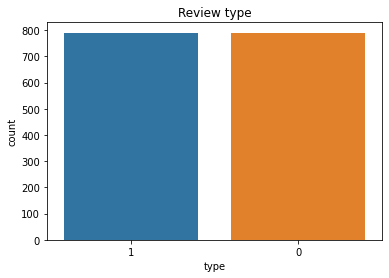

In [7]:
sns.countplot(
  x='rating',
  data=df,
  order=df.rating.value_counts().index
)

plt.xlabel("type")
plt.title("Review type")

In [8]:
df.head()

,review,rating
571,Very good product,1
281,Very comfortable and nice look,1
1303,Loking so nice but size not fit 10 numb not pa...,0
848,Loking so nice but size not fit 10 numb not pa...,0
1297,Very comfortable and nice look,1


In [9]:
positive_reviews = df[df.rating == 1]
negative_reviews = df[df.rating== 0]

In [10]:
print(positive_reviews.shape, negative_reviews.shape)

(790, 2) (790, 2)


from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
positive_reviews_text = " ".join(positive_reviews.review.to_numpy().tolist())
negative_reviews_text = " ".join(negative_reviews.review.to_numpy().tolist())

positive_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(positive_reviews_text)
negative_reviews_cloud = WordCloud(stopwords=STOPWORDS, background_color="black").generate(negative_reviews_text)

In [11]:
def show_word_cloud(cloud, title):
    plt.figure(figsize = (20, 20))
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show();

In [12]:
show_word_cloud(positive_reviews_cloud, "Common Words in Positive Reviews")

NameError: name 'positive_reviews_cloud' is not defined

In [ ]:
show_word_cloud(negative_reviews_cloud, "Common Words in Negative Reviews")

In [ ]:
y = df["rating"]
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['review'].values,df["rating"].values,test_size=0.2)
print(f"Total training samples: {x_train.shape}")
print(f"Total training samples: {y_train.shape}")
print(f"Total training samples: {x_test.shape}")
print(f"Total testing samples: {y_test.shape}")
print("review:",x_train[580])
print("rating:",y_train[580])

In [ ]:
#removing emoji's
import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

#applying function to the column
df['emojifree']=df['review'].apply(lambda x:remove_emojis(x))
df

In [ ]:
string.punctuation
def remove_punctuation(reviews):
    punctuationfree=''.join([i for i in reviews if i not in string.punctuation])
    return punctuationfree
df['clean_text']=df['emojifree'].apply(lambda x:remove_punctuation(x))
df.head()

In [ ]:
#lowering case
df['clean_text']=df['clean_text'].apply(lambda x:x.lower())
df.head()

In [ ]:
import nltk
nltk.download("popular")

In [ ]:
#Stop words present in the library
stopwords_english = nltk.corpus.stopwords.words('english')
stopwords_english[0:10]

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
stop = stopwords.words('english')
df['cleantext'] = df['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))
df.head()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer=TextVectorization(max_tokens=None,standardize='lower_and_strip_punctuation',split='whitespace',
    ngrams=None,
    output_mode='int',
    output_sequence_length=None,)

In [ ]:
text_vectorizer.adapt(x_train)
text_vectorizer(x_train)

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unkno
bottom_5_words = words_in_vocab[-5:] # least common tokens
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}")
print(f"Bottom 5 least common words: {bottom_5_words}")

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=10000, # set input shape
output_dim=128, # set size of embedding vector
embeddings_initializer="uniform", # default, intialize rand
input_length=14, # how long is each input
name="embedding_1")
embedding

In [ ]:
# Get a random sentence from training set
import random
random_sentence = random.choice(x_train)
print(f"Original text:\n{random_sentence}\
\n\nEmbedded version:")
# Embed the random sentence (turn it into numerical representation)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
# Create tokenization and modelling pipeline
model_0 = Pipeline([
("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
("clf", MultinomialNB()) # model the text
])
# Fit the pipeline to the training data
model_0.fit(x_train, y_train)

In [ ]:
baseline_score = model_0.score(x_test, y_test)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

In [ ]:
# Make predictions
baseline_preds = model_0.predict(x_test)
baseline_preds[:20]

In [ ]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
def calculate_results(y_true, y_pred):
    model_accuracy = accuracy_score(y_true, y_pred) * 100
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred)
    model_results = {"accuracy": model_accuracy,"precision": model_precision,"recall": model_recall,"f1": model_f1}
    return model_results

In [ ]:
# Get baseline results
baseline_results = calculate_results(y_true=y_test,y_pred=baseline_preds)
baseline_results

In [ ]:
# Set random seed and create embedding layer (new embedding layer for each model)
tf.random.set_seed(42)
max_vocab_length=10000
max_length=14
from tensorflow.keras import layers
model_4_embedding = layers.Embedding(input_dim=max_vocab_length,
output_dim=128,
embeddings_initializer="uniform",
input_length=max_length,
name="embedding_4")

In [ ]:
# Build a Bidirectional RNN in TensorFlow
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = model_4_embedding(x)
# x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x) # stacking RNN lay
x = layers.Bidirectional(layers.GRU(64))(x) # bidirectional goes both ways so has double
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [ ]:
# Compile
model_4.compile(loss="binary_crossentropy",
optimizer=tf.keras.optimizers.Adam(),
metrics=["accuracy"])

In [ ]:
# Get a summary of our bidirectional model
model_4.summary()

In [ ]:
# Fit the model (takes longer because of the bidirectional layers)
model_4_history = model_4.fit(x_train,
                              y_train,
                              epochs=5,
                              validation_data=(x_test, y_test))

In [ ]:
# Make predictions with bidirectional RNN on the validation data
model_4_pred_probs = model_4.predict(x_test)
model_4_pred_probs[:10]

In [ ]:
# Convert prediction probabilities to labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

In [ ]:
# Calculate bidirectional RNN model results
model_4_results = calculate_results(y_test, model_4_preds)
model_4_results

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": x_test,
"target": y_test,
"pred": model_4_preds,
"pred_prob": tf.squeeze(model_4_pred_probs)})
val_df.tail(20)

In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", ascending=False)
most_wrong[:10]

In [ ]:
# Check the false positives (model predicted 1 when should've been 0)
for row in most_wrong[:10].itertuples(): # loop through the top 10 rows (change the index to view different rows)
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

In [ ]:
# Check the most wrong false negatives (model predicted 0 when should've predict 1)
for row in most_wrong[-10:].itertuples():
    _, text, target, pred, prob = row
    print(f"Target: {target}, Pred: {int(pred)}, Prob: {prob}")
    print(f"Text:\n{text}\n")
    print("----\n")

In [ ]:
# Making predictions on the test dataset
test_sentences = val_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
    pred_prob = tf.squeeze(model_4.predict([test_sample])) # has to be list
    pred = tf.round(pred_prob)
    print(f"Pred: {int(pred)}, Prob: {pred_prob}")
    print(f"Text:\n{test_sample}\n")
    print("----\n")

In [ ]:
def predict_on_sentence(model, sentence):
    pred_prob = model.predict([sentence])
    pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
    print(f"Pred: {pred_label}", "(positive)" if pred_label > 0 else "(negative)", f"Prob: {pred_prob[0][0]}")
    print(f"Text:\n{sentence}")
    

In [ ]:
tryme=['I hated it','Disappointing product','Nice shoes','Very good']
t='Very good I am so happy'
t1=''

In [ ]:
# Make a prediction on a sentence
predict_on_sentence(model=model_4,sentence=t1)

In [ ]:
pred_prob = model_4.predict(tryme)
pred_prob

In [ ]:
pred_prob = tf.squeeze(model_4.predict([test_sample]))
pred_prob